Resultados esperados:
 - input: 
    - avg_runtime
    - input_complexity
    - speedup
    - eficiencia
 - output: 
    - p_cores


In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

In [3]:
df_clean = pd.read_csv("dataset/clean_data.csv")
df_clean['cores'] = df_clean['cores']/df_clean['cores'].max()
df_clean['input'] = df_clean['input']/df_clean['input'].max()

In [4]:
X = df_clean[['input', 'average_runtime', 'speedup', 'efficiency']].values
y = df_clean['cores'].values

#### LSTM Model

In [ ]:
learning_rate = 0.001

model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(2, activation="relu", dropout=0.2, input_shape=(x_train.shape[1],1)))
model.add(tf.keras.layers.Dense(16))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss="mse",
              metrics=['accuracy'])

model.summary()

history = model.fit(x_train, y_train, batch_size=1, epochs=30, verbose=2)

In [ ]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [ ]:
# plot the training loss and accuracy
plt.style.use("ggplot")
fig, ax = plt.subplots(1,1,figsize=(10,8))

ax.plot(np.arange(0, 100), history.history["loss"], label="train_loss",linestyle='--')
ax.set_title("Training Loss and Accuracy")
ax.set_xlabel("Epoch #")
ax.legend()
plt.show()

### Regression Models

#### MLP Regression Model

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

In [11]:
learning_rate = 0.001
input_shape = (X_train.shape[1],)

callback = EarlyStopping(monitor="loss", patience=10)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape = input_shape))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, batch_size=32, epochs=500, verbose=2, validation_data=(X_test, y_test), callbacks=[callback])

Epoch 1/500
7/7 - 0s - loss: 0.0938 - val_loss: 0.0661 - 350ms/epoch - 50ms/step
Epoch 2/500
7/7 - 0s - loss: 0.0789 - val_loss: 0.0540 - 20ms/epoch - 3ms/step
Epoch 3/500
7/7 - 0s - loss: 0.0697 - val_loss: 0.0477 - 20ms/epoch - 3ms/step
Epoch 4/500
7/7 - 0s - loss: 0.0628 - val_loss: 0.0472 - 26ms/epoch - 4ms/step
Epoch 5/500
7/7 - 0s - loss: 0.0584 - val_loss: 0.0440 - 23ms/epoch - 3ms/step
Epoch 6/500
7/7 - 0s - loss: 0.0552 - val_loss: 0.0422 - 20ms/epoch - 3ms/step
Epoch 7/500
7/7 - 0s - loss: 0.0526 - val_loss: 0.0398 - 21ms/epoch - 3ms/step
Epoch 8/500
7/7 - 0s - loss: 0.0506 - val_loss: 0.0383 - 20ms/epoch - 3ms/step
Epoch 9/500
7/7 - 0s - loss: 0.0491 - val_loss: 0.0380 - 21ms/epoch - 3ms/step
Epoch 10/500
7/7 - 0s - loss: 0.0476 - val_loss: 0.0367 - 22ms/epoch - 3ms/step
Epoch 11/500
7/7 - 0s - loss: 0.0473 - val_loss: 0.0360 - 22ms/epoch - 3ms/step
Epoch 12/500
7/7 - 0s - loss: 0.0453 - val_loss: 0.0360 - 21ms/epoch - 3ms/step
Epoch 13/500
7/7 - 0s - loss: 0.0444 - val_loss

In [5]:
loss = model.evaluate(X_test, y_test)
print(f'Erro no conjunto de teste: {loss}')

predictions = model.predict(X_test)

for i in range(10):
    print(f'Valor Real: {y_test[i]}, Previsão: {predictions[i][0]}')

3/3 [==============================] - 0s 3ms/step - loss: 0.0042
Erro no conjunto de teste: 0.00423419289290905
3/3 [==============================] - 0s 3ms/step
Valor Real: 0.1875, Previsão: 0.14959311485290527
Valor Real: 0.90625, Previsão: 0.8766377568244934
Valor Real: 0.59375, Previsão: 0.6690213680267334
Valor Real: 0.71875, Previsão: 0.6568863987922668
Valor Real: 0.84375, Previsão: 0.8327068090438843
Valor Real: 0.1875, Previsão: 0.1388242393732071
Valor Real: 0.0625, Previsão: 0.04049396887421608
Valor Real: 0.03125, Previsão: 0.008417685516178608
Valor Real: 0.5625, Previsão: 0.550567090511322
Valor Real: 0.96875, Previsão: 0.9392473697662354


#### MLP Regression Model with Leave-One-Out-Validation (LOOCV)

In [5]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error

loo = LeaveOneOut()
mse_scores = []
best_model = None
best_mse = float('inf')
callback = EarlyStopping(monitor="loss", patience=3)

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    learning_rate = 0.001
    input_shape = (X_train.shape[1],)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=input_shape))
    model.add(tf.keras.layers.Dense(8, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='mean_squared_error')

    model.fit(X_train, y_train, epochs=10, verbose=0, callbacks=[callback])

    predictions = model.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    mse_scores.append(mse)

    if mse < best_mse:
        best_model = model
        best_mse = mse
    
mean_mse = np.mean(mse_scores)

print(f'Erro médio quadrático usando LOOCV: {mean_mse}')

1/1 [==============================] - 0s 29ms/step
Erro médio quadrático usando LOOCV: 0.05590887520104189


In [6]:
min(mse_scores)

6.272115946615031e-07

### Classification Models

#### MLP Classification Model

In [6]:
import keras
from keras import layers

data = pd.read_csv("dataset\clean_data.csv")

data['labels'] = data['cores'].max() - data['cores']
X = data[['input', 'average_runtime', 'speedup', 'efficiency']].values
y = data['labels'].values
X = (X - X.mean(axis=0)) / X.std(axis=0)  # Normalização Z-score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_classes = np.unique(y).size

a = y_train
y_train = to_categorical(y_train, num_classes, dtype='int8')
y_test = to_categorical(y_test, num_classes, dtype='int8')

model = keras.Sequential([
    layers.Input(shape=(4,)),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.15),
    layers.Dense(num_classes, activation='softmax')
])

lr = 0.0001
optimizer = keras.optimizers.Adam(learning_rate=lr)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.2)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Acurácia no conjunto de teste: {test_acc * 100:.2f}%")

predictions = model(X_test)

Epoch 1/300
7/7 [==============================] - 2s 46ms/step - loss: 3.4543 - accuracy: 0.0392 - val_loss: 3.4745 - val_accuracy: 0.0192
Epoch 2/300
7/7 [==============================] - 0s 12ms/step - loss: 3.4701 - accuracy: 0.0392 - val_loss: 3.4733 - val_accuracy: 0.0192
Epoch 3/300
7/7 [==============================] - 0s 10ms/step - loss: 3.4521 - accuracy: 0.0539 - val_loss: 3.4718 - val_accuracy: 0.0192
Epoch 4/300
7/7 [==============================] - 0s 10ms/step - loss: 3.4543 - accuracy: 0.0343 - val_loss: 3.4703 - val_accuracy: 0.0000e+00
Epoch 5/300
7/7 [==============================] - 0s 9ms/step - loss: 3.4487 - accuracy: 0.0490 - val_loss: 3.4688 - val_accuracy: 0.0000e+00
Epoch 6/300
7/7 [==============================] - 0s 10ms/step - loss: 3.4483 - accuracy: 0.0392 - val_loss: 3.4672 - val_accuracy: 0.0000e+00
Epoch 7/300
7/7 [==============================] - 0s 18ms/step - loss: 3.4576 - accuracy: 0.0539 - val_loss: 3.4655 - val_accuracy: 0.0000e+00
Epoch

Text(113.9222222222222, 0.5, 'predicted label')

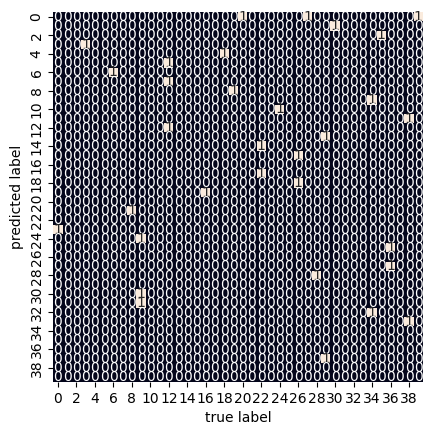

In [7]:
predictions=np.argmax(predictions, axis=0)
y_test=np.argmax(y_test, axis=0)

matrix=confusion_matrix(y_test, predictions)
sns.heatmap(matrix, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')